In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
pd.set_option('display.max_columns', None)

In [2]:


dataset3 = pd.read_csv(r"C:\Users\a.sochaj\Downloads\RaportHistoryczny_24_02_2023_14_40_33_CET.csv",
                     engine = 'python',
                     sep = ';',
                     decimal = ',')

columns = ['Data odczytu', 'Objętość [m3]',
       'Przepływ szczytowy [m3/h]', 'Moc szczytowa [kW]',
       'Data wystąpienia przepływu szczytowego', 
       'Data wystąpienia mocy maksymalnej', 'Energia [GJ]',
       'Przepływ [l/h]', 'Moc [kW]', 'Temperatura zasilania [°C]',
       'Temperatura powrotu [°C]', 'Różnica temperatur [°C]']


dataset3 = dataset3[columns]


In [3]:


dataset2 = pd.read_csv(r"C:\Users\a.sochaj\Downloads\RaportHistoryczny_24_02_2023_09_56_53_CET.csv",
                     engine = 'python',
                     sep = ';',
                     decimal = ',')

columns = ['Data odczytu', 'Objętość [m3]',
       'Przepływ szczytowy [m3/h]', 'Moc szczytowa [kW]',
       'Data wystąpienia przepływu szczytowego', 
       'Data wystąpienia mocy maksymalnej', 'Energia [GJ]',
       'Przepływ [l/h]', 'Moc [kW]', 'Temperatura zasilania [°C]',
       'Temperatura powrotu [°C]', 'Różnica temperatur [°C]']


dataset2 = dataset2[columns]


In [4]:
dataset1 = pd.read_csv(r"C:\Users\a.sochaj\Downloads\RaportHistoryczny_24_02_2023_09_46_50_CET.csv",
                     engine = 'python',
                     sep = ';',
                     decimal = ',')

columns = ['Data odczytu', 'Objętość [m3]',
       'Przepływ szczytowy [m3/h]', 'Moc szczytowa [kW]',
       'Data wystąpienia przepływu szczytowego', 
       'Data wystąpienia mocy maksymalnej', 'Energia [GJ]',
       'Przepływ [l/h]', 'Moc [kW]', 'Temperatura zasilania [°C]',
       'Temperatura powrotu [°C]', 'Różnica temperatur [°C]']


dataset1 = dataset1[columns]


In [5]:
dataset = pd.read_csv(r"C:\Users\a.sochaj\Downloads\RaportHistoryczny_24_02_2023_08_59_34_CET.csv",
                     engine = 'python',
                     sep = ';',
                     decimal = ',')

columns = ['Data odczytu', 'Objętość [m3]',
       'Przepływ szczytowy [m3/h]', 'Moc szczytowa [kW]',
       'Data wystąpienia przepływu szczytowego', 
       'Data wystąpienia mocy maksymalnej', 'Energia [GJ]',
       'Przepływ [l/h]', 'Moc [kW]', 'Temperatura zasilania [°C]',
       'Temperatura powrotu [°C]', 'Różnica temperatur [°C]']


dataset = dataset[columns]
dataset = dataset.append(dataset1)
dataset = dataset.append(dataset2)
dataset = dataset.append(dataset3)

In [6]:
def changeTypes(df):
    
    dfTemp = df.copy()
    
    dataCols = ['Data odczytu',
       'Data wystąpienia przepływu szczytowego', 
       'Data wystąpienia mocy maksymalnej']
    
    for column in dfTemp:
        if column in dataCols:
            dfTemp[column] = pd.to_datetime(df[column])
        else:
            dfTemp[column] = pd.to_numeric(df[column])
    
    return dfTemp

In [7]:
dataset = changeTypes(dataset)


In [8]:
dataset.set_index('Data odczytu', drop = False, inplace = True)

In [9]:
# dataset[(dataset.index > '2022-08-29 00:00:00') & 
#        (dataset.index < '2022-08-29 23:00:00')].plot(kind = 'scatter', x = 'Data odczytu', y = 'Moc [kW]', figsize = (20,10))

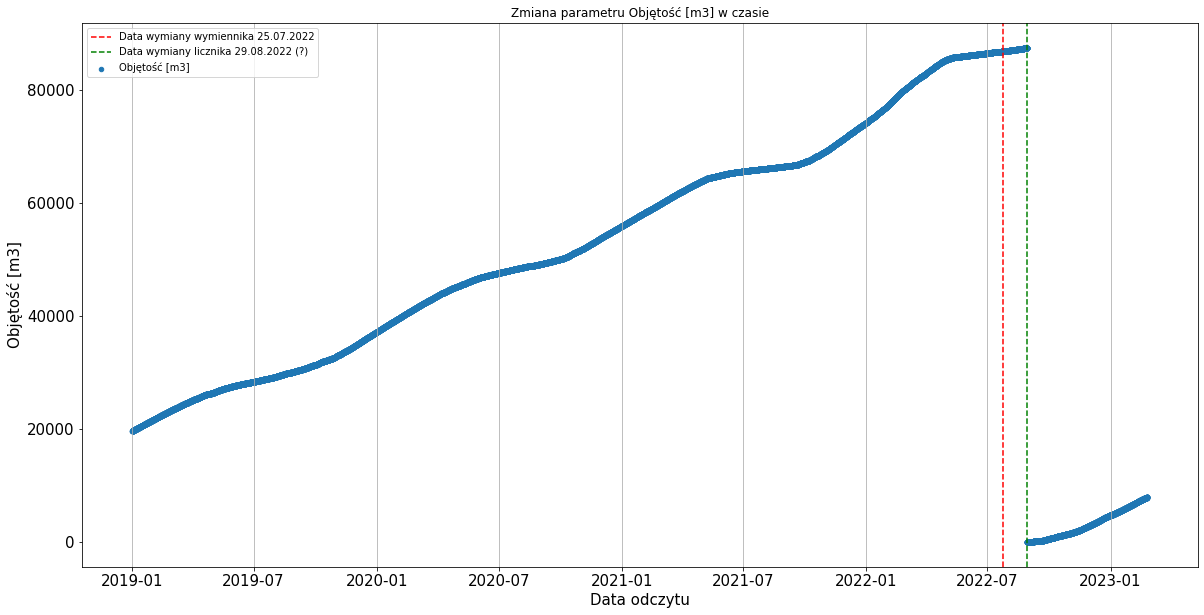

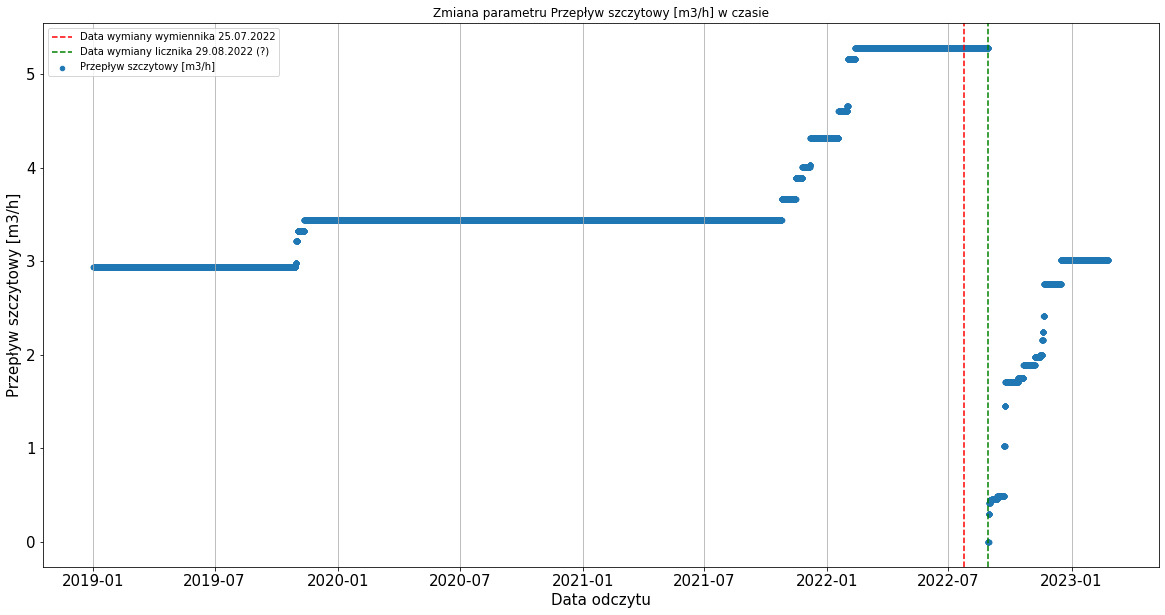

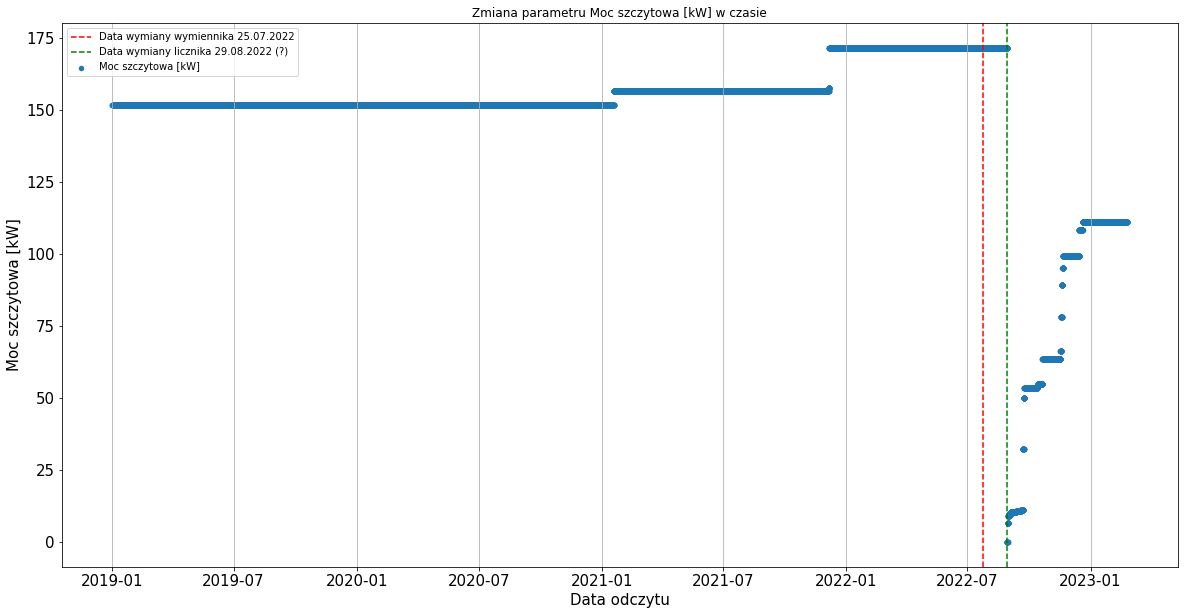

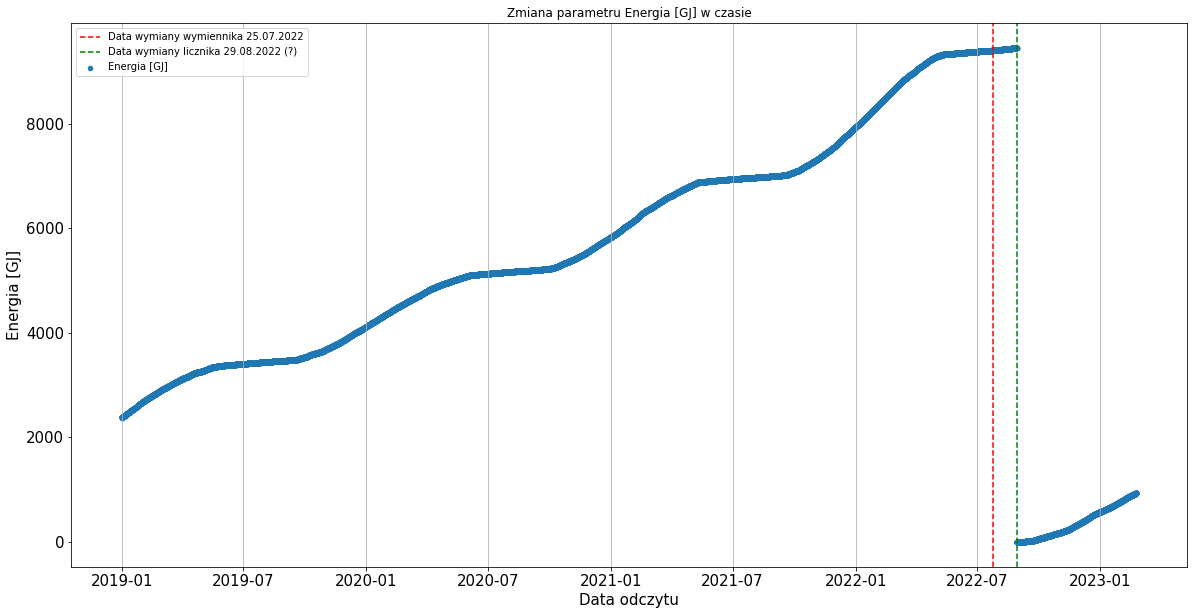

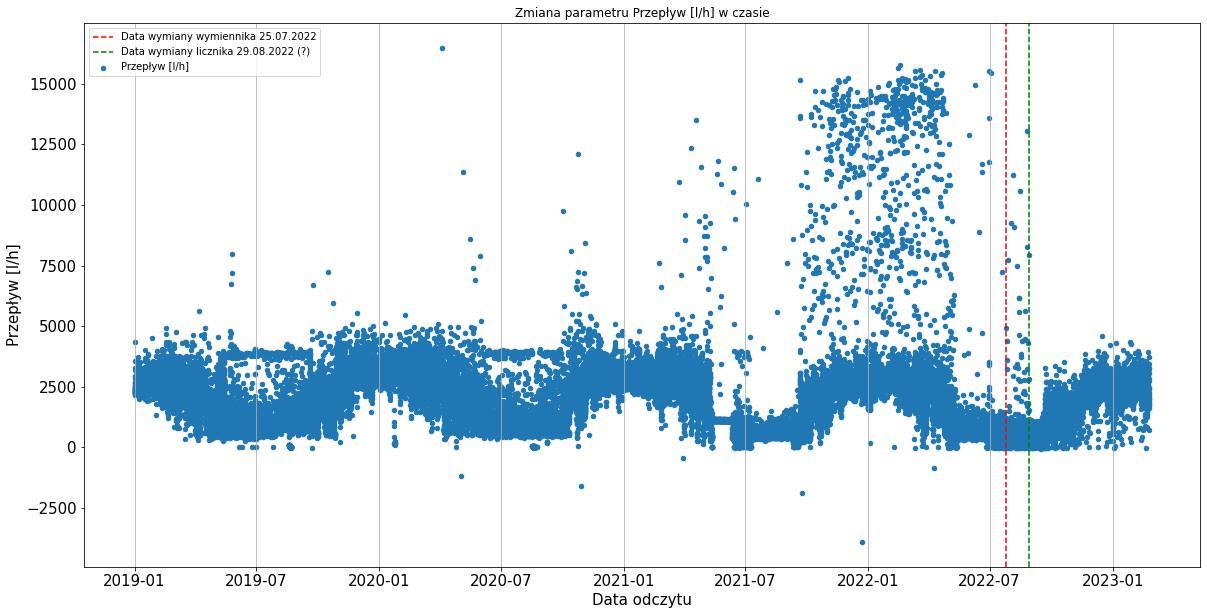

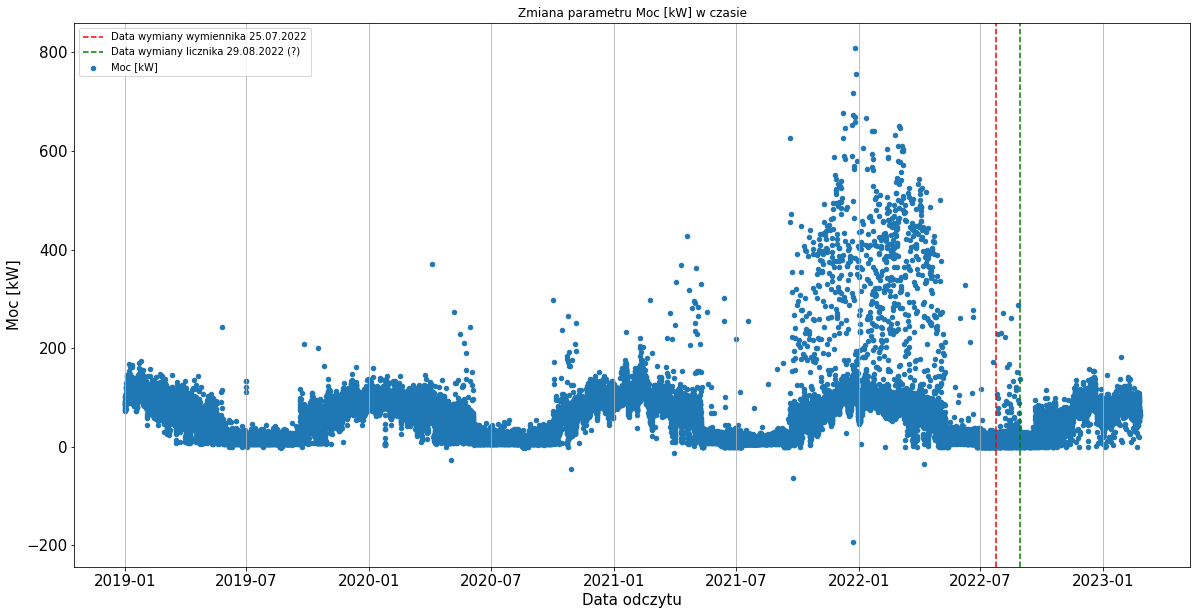

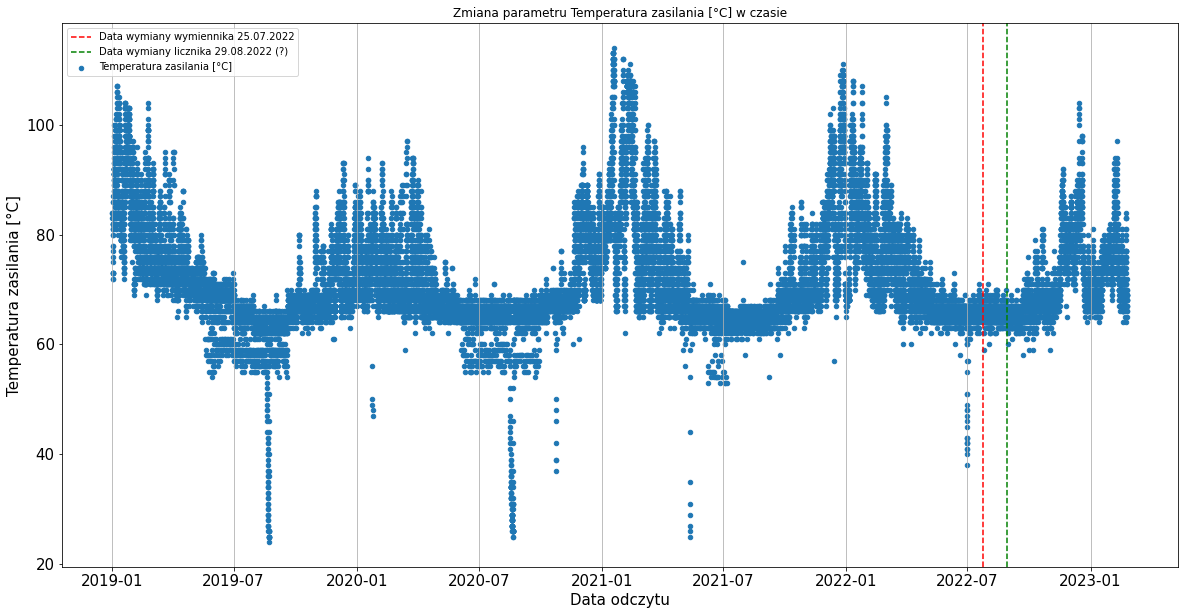

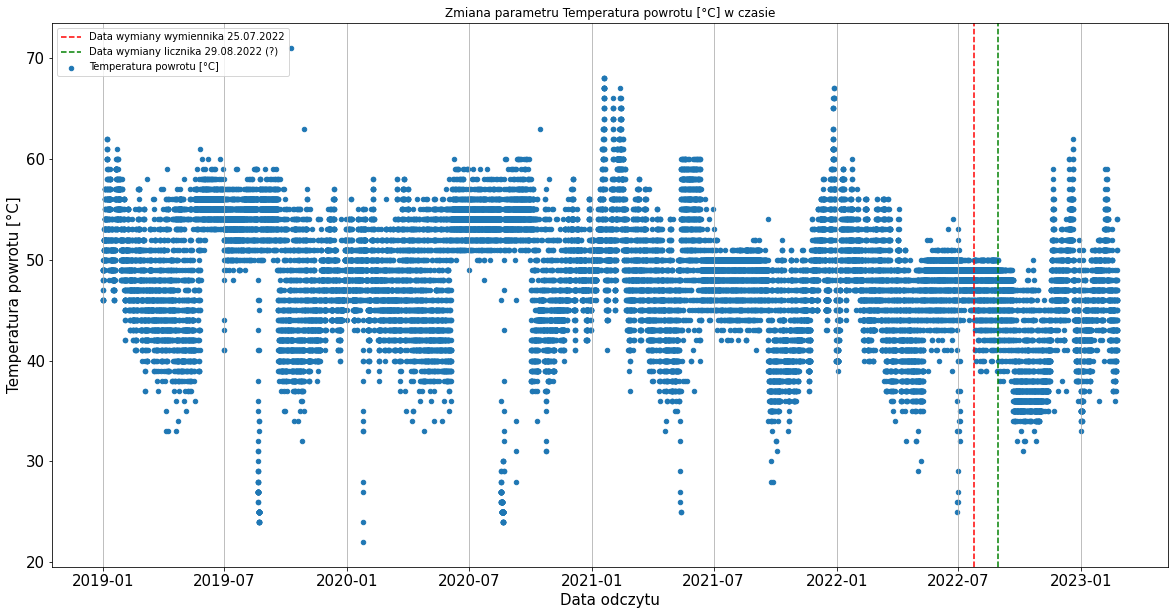

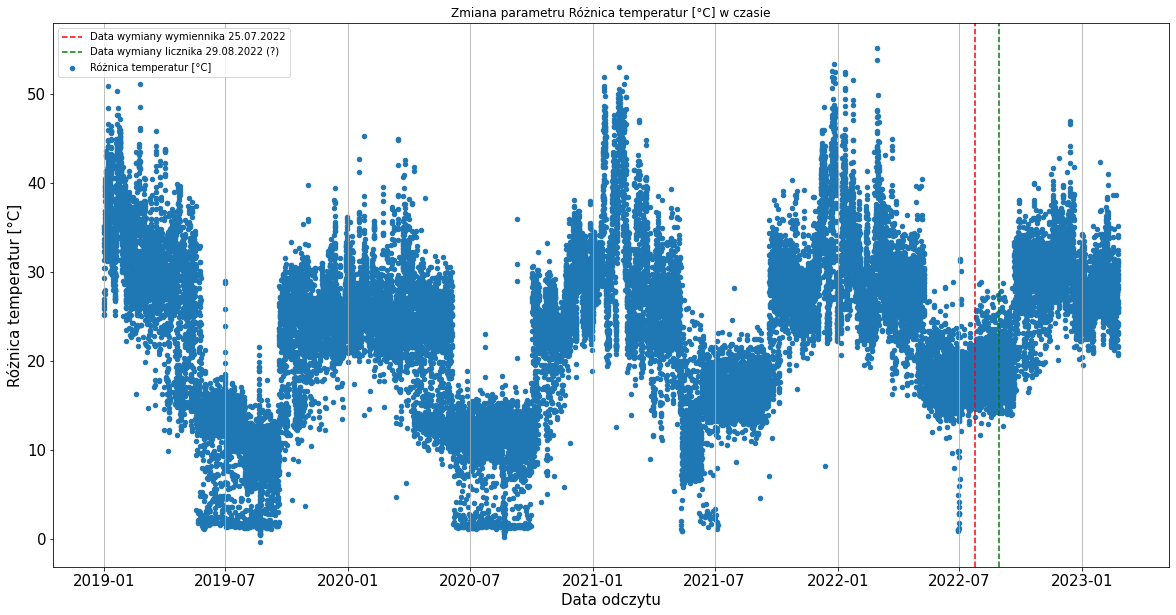

In [21]:
data_wc = '2022-07-25 00:00:01'
format = "%Y-%m-%d %H:%M:%S"  # The format
dataWc = datetime.datetime.strptime(data_wc
                                  , format
                                 )
data_lc = '2022-08-29 09:00:00'
format = "%Y-%m-%d %H:%M:%S"  # The format
dataLc = datetime.datetime.strptime(data_lc
                                  , format
                                 )



dataset.index = pd.to_datetime(dataset.index)
for column in dataset.columns:
    if dataset[column].dtype == 'float64':
        fig, ax = plt.subplots(figsize = (20,10))
        dataset.plot(kind = 'scatter', x = 'Data odczytu', y = column, ax = ax,  label = column )
        
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(15)
   
        plt.ylabel(column)
        plt.title(f"Zmiana parametru {column} w czasie")
        

        ax.axvline(x = dataWc, color = 'red', ls = "--", label = "Data wymiany wymiennika 25.07.2022" )
        ax.axvline(x = dataLc, color = 'green', ls = "--", label = "Data wymiany licznika 29.08.2022 (?)" )
        plt.legend(loc = 0)
        plt.grid(axis = 'x')
        plt.show()

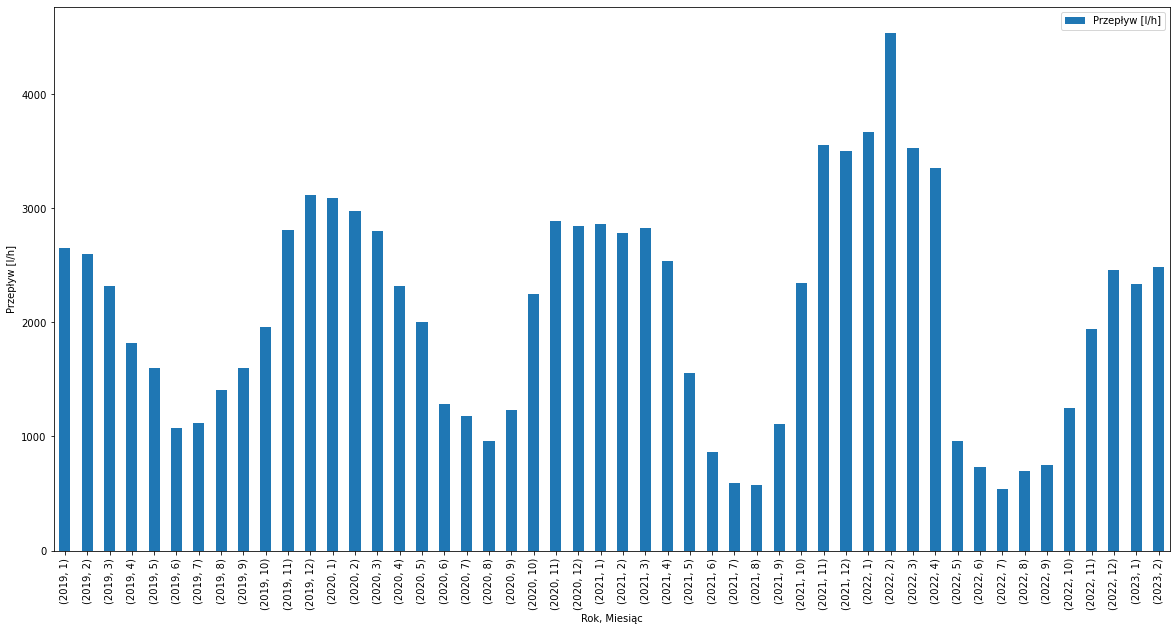

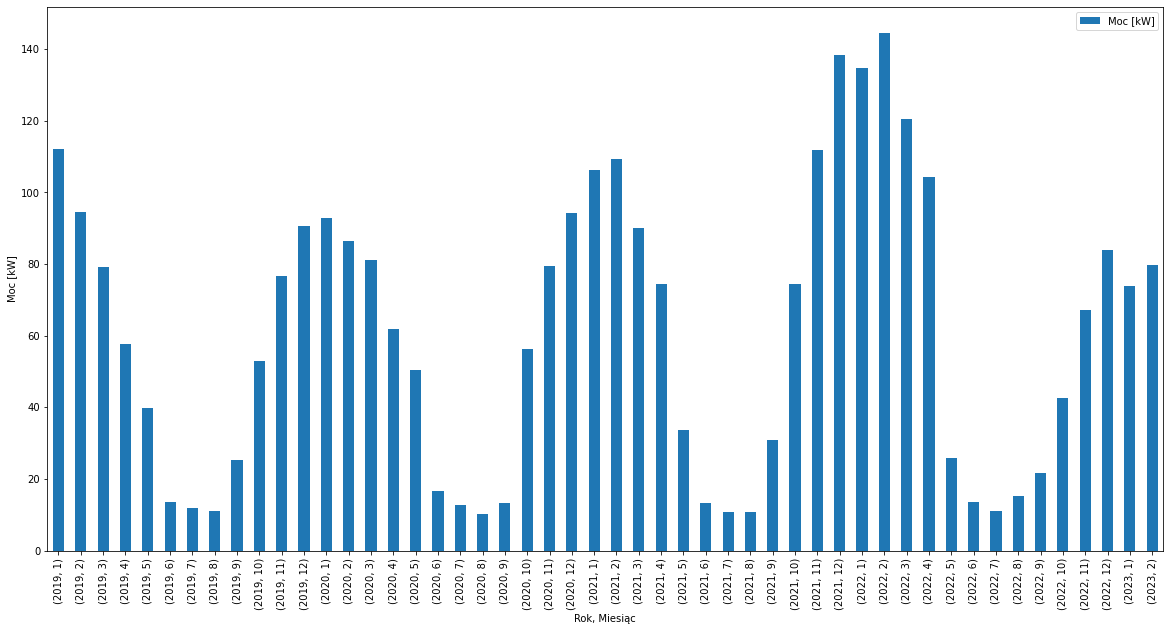

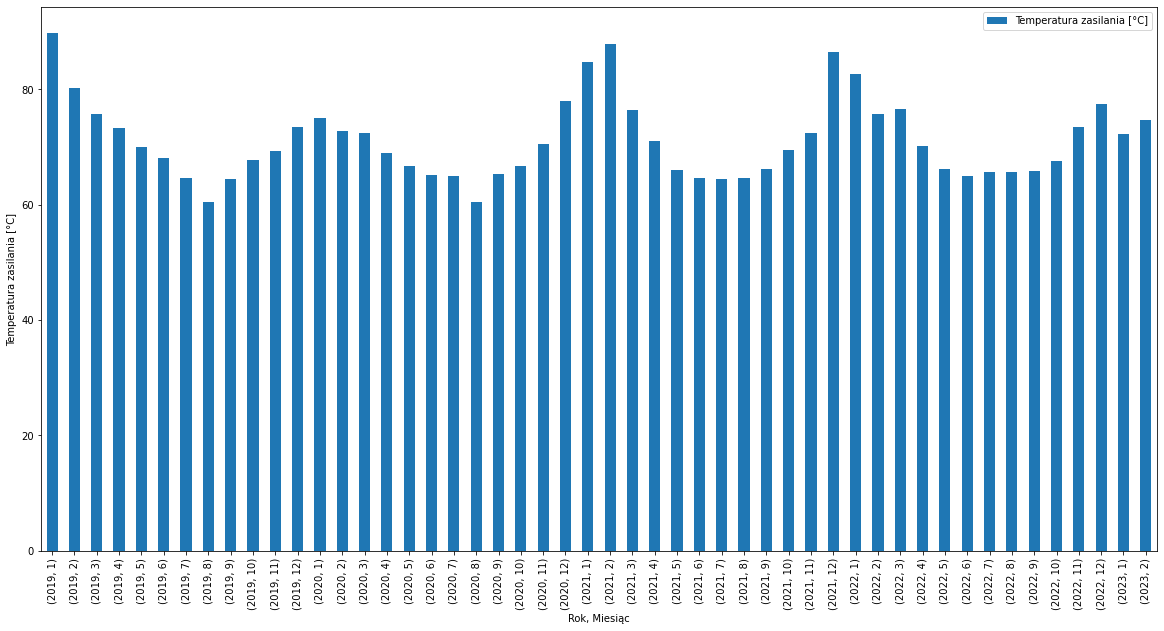

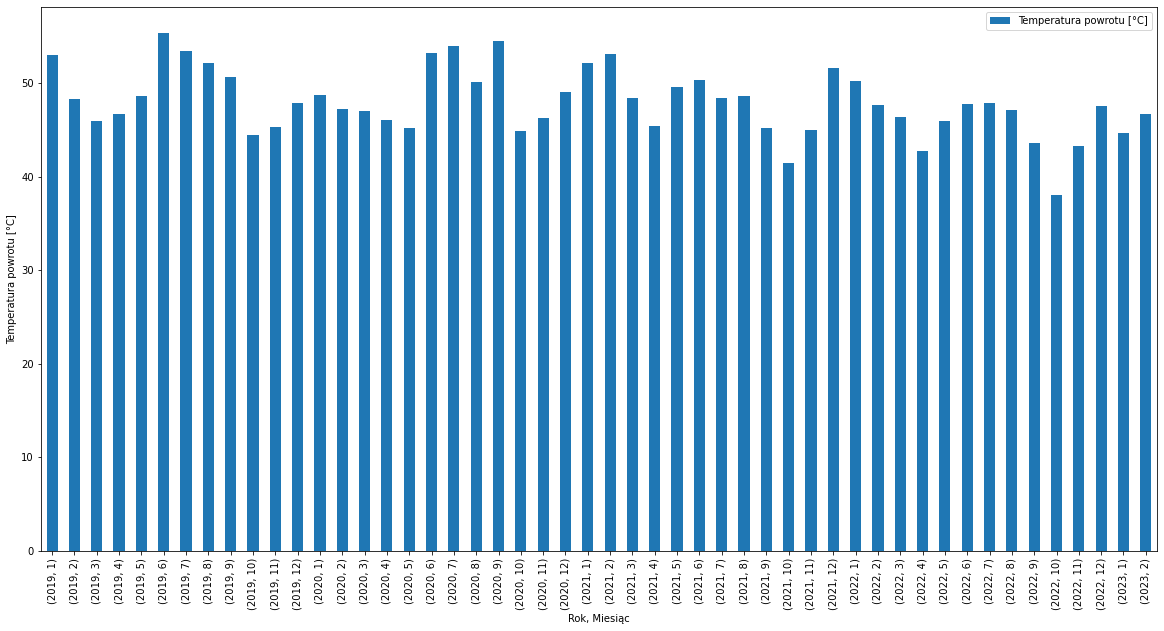

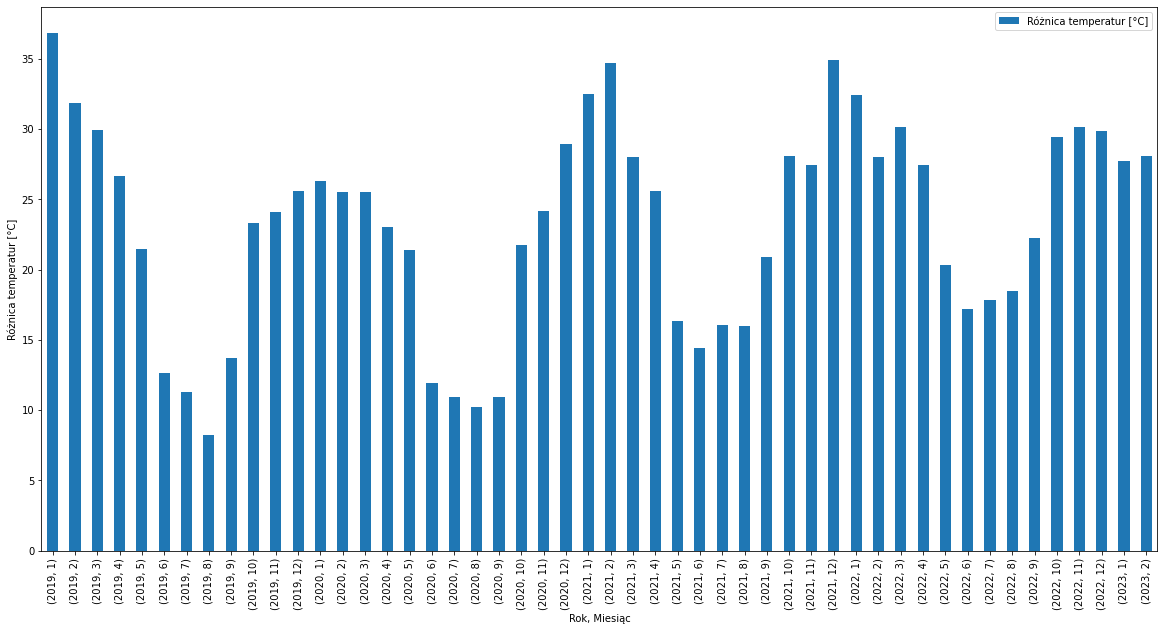

In [11]:
dataset['Miesiąc'] = dataset.index.month
dataset['Rok'] = dataset.index.year
summYearMonth = dataset[['Data odczytu', 'Rok',  'Miesiąc','Przepływ [l/h]',
       'Moc [kW]', 'Temperatura zasilania [°C]', 'Temperatura powrotu [°C]',
       'Różnica temperatur [°C]']].groupby(by = ['Rok','Miesiąc']).mean()

for column in summYearMonth.columns:
    summYearMonth.plot( kind = 'bar',y = column, figsize = (20,10))
    plt.xlabel('Rok, Miesiąc')
    plt.ylabel(column)
    
    

In [12]:
dataset['Miesiąc'] = dataset.index.month
dataset['Rok'] = dataset.index.year
summMonthYear = dataset[['Data odczytu', 'Rok',  'Miesiąc','Przepływ [l/h]',
       'Moc [kW]', 'Temperatura zasilania [°C]', 'Temperatura powrotu [°C]',
       'Różnica temperatur [°C]']].groupby(by = ['Miesiąc', 'Rok']).mean()

# for column in summMonthYear.columns:
    
#     summMonthYear.plot( kind = 'bar',y = column, figsize = (20,10))
#     plt.xlabel('Rok, Miesiąc')
#     plt.ylabel(column)

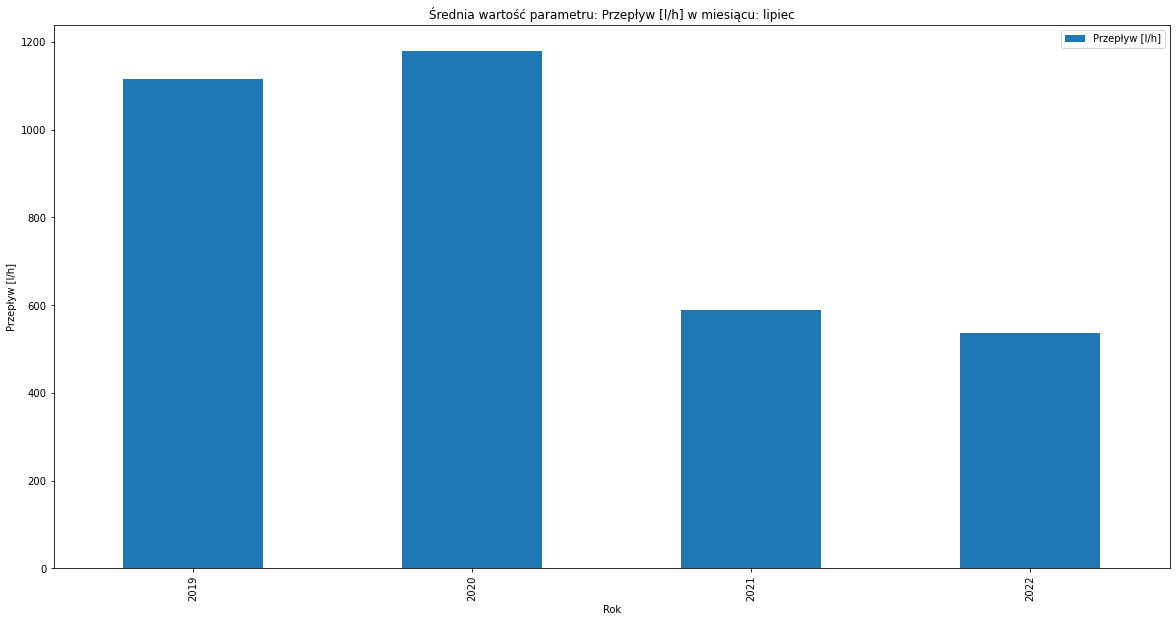

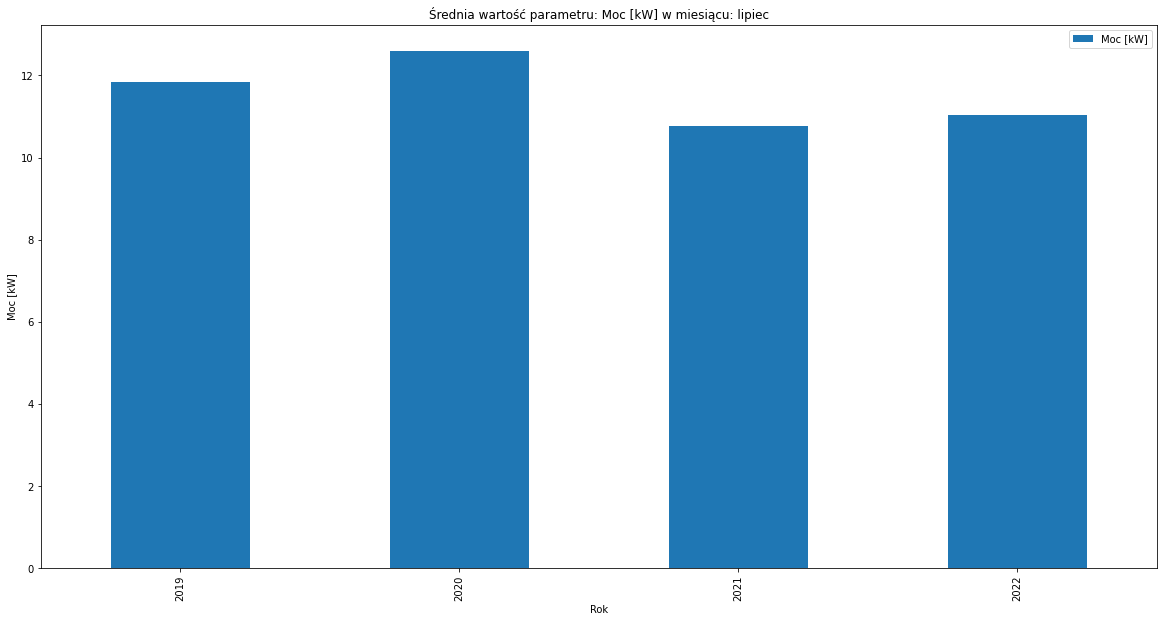

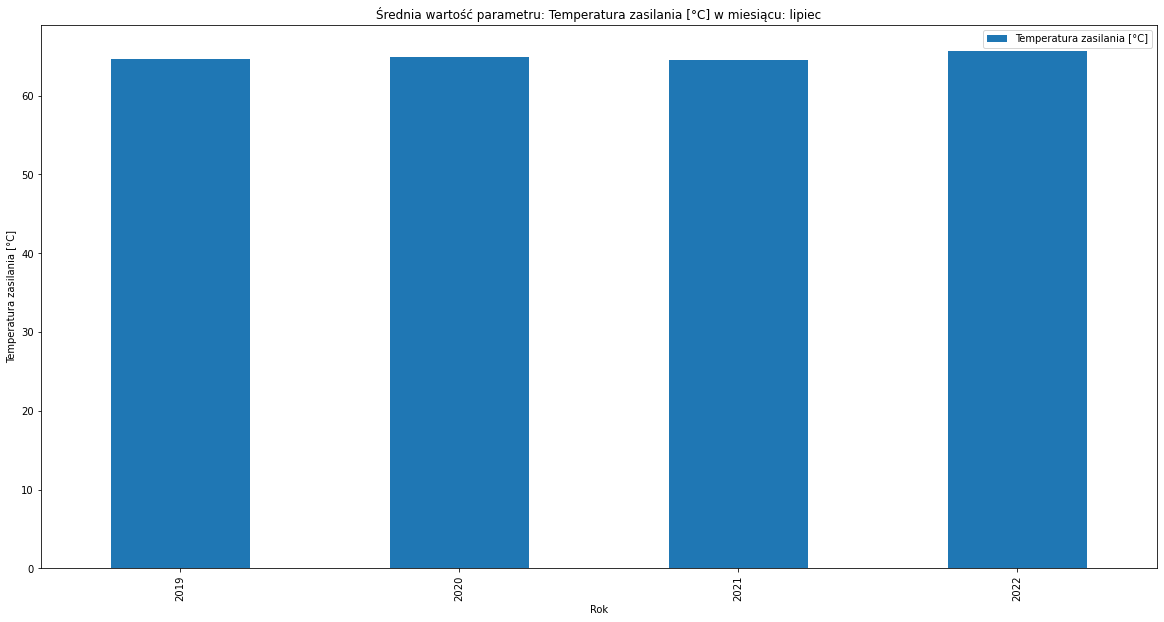

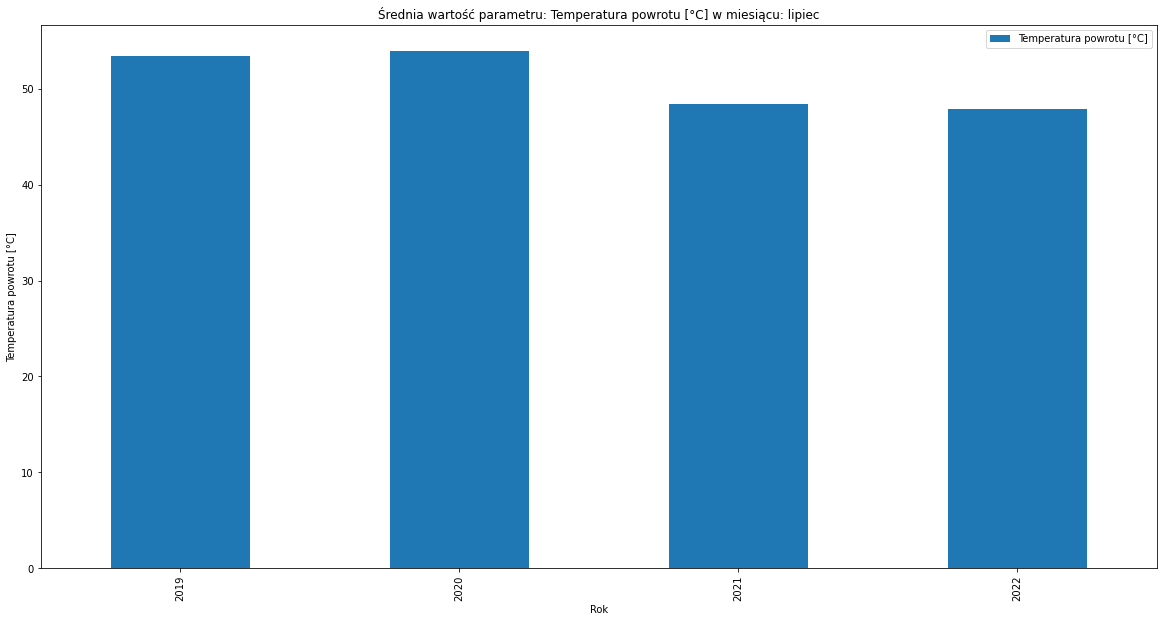

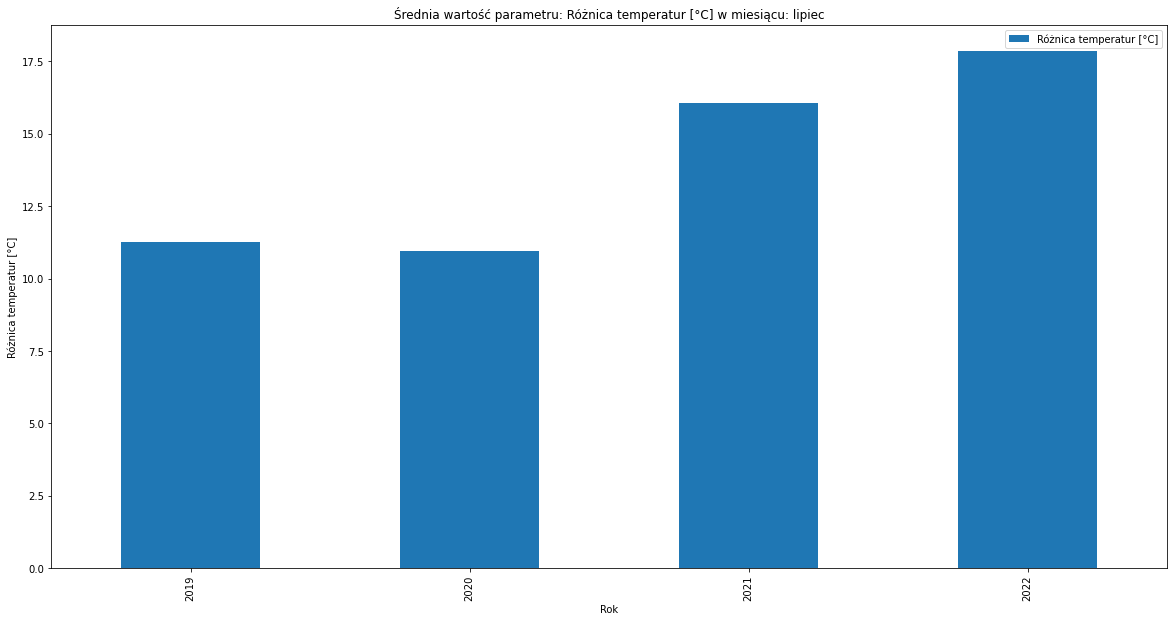

In [13]:

monthDics = {
    '1':'styczeń',
    '2':'luty',
    '3':'marzec',
    '4':'kwiecień',
    '5':'maj',
    '6':'czerwiec',
    '7':'lipiec',
    '8':'sierpień',
    '9':'wrzesień',
    '10':'październik',
    '11':'listopad',
    '12':'grudzień'    
}

for monthIdx in range(7,8):
    for column in summMonthYear.columns:
        
        summMonthYear.loc[(monthIdx)][column].plot(kind = 'bar', figsize = (20,10))
        plt.legend(loc = 0)
        month = monthDics[str(monthIdx)]
        plt.title(f"Średnia wartość parametru: {column} w miesiącu: {month}")
        plt.xlabel('Rok')
        plt.ylabel(column)

        plt.show()

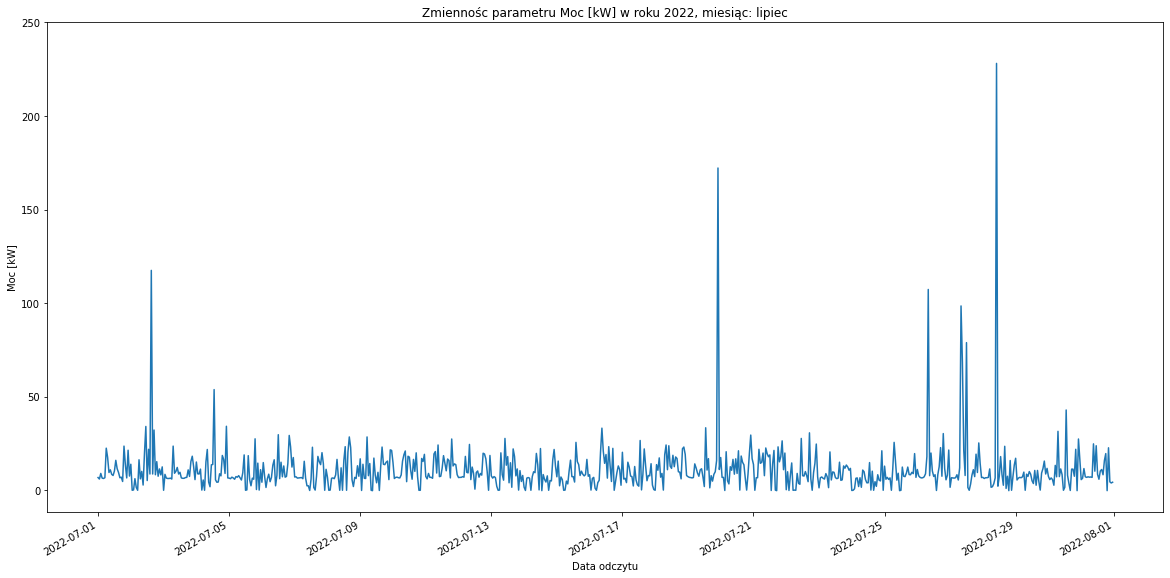

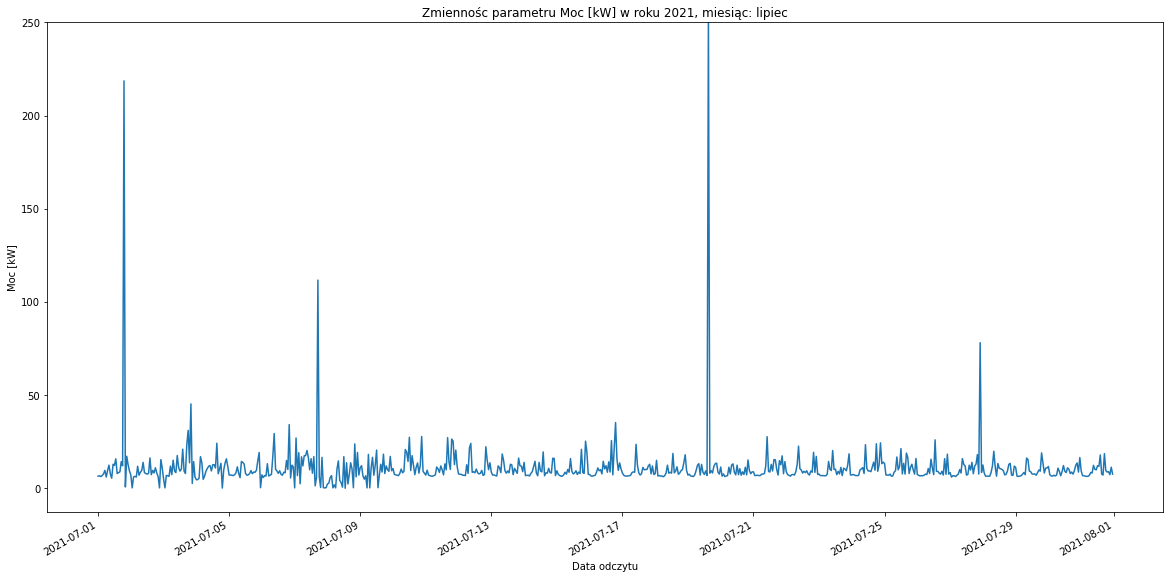

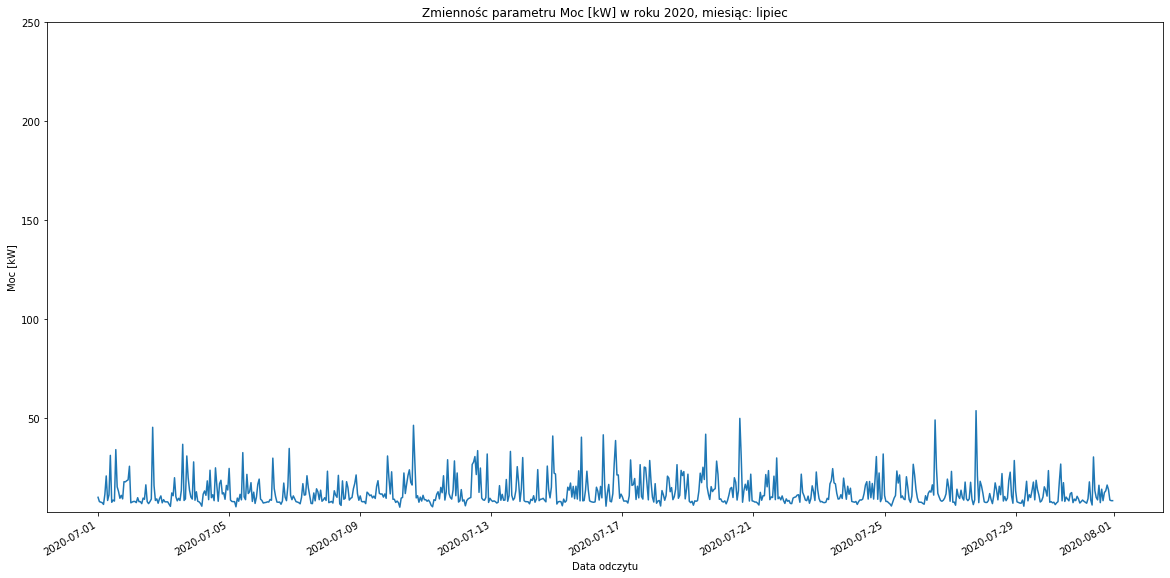

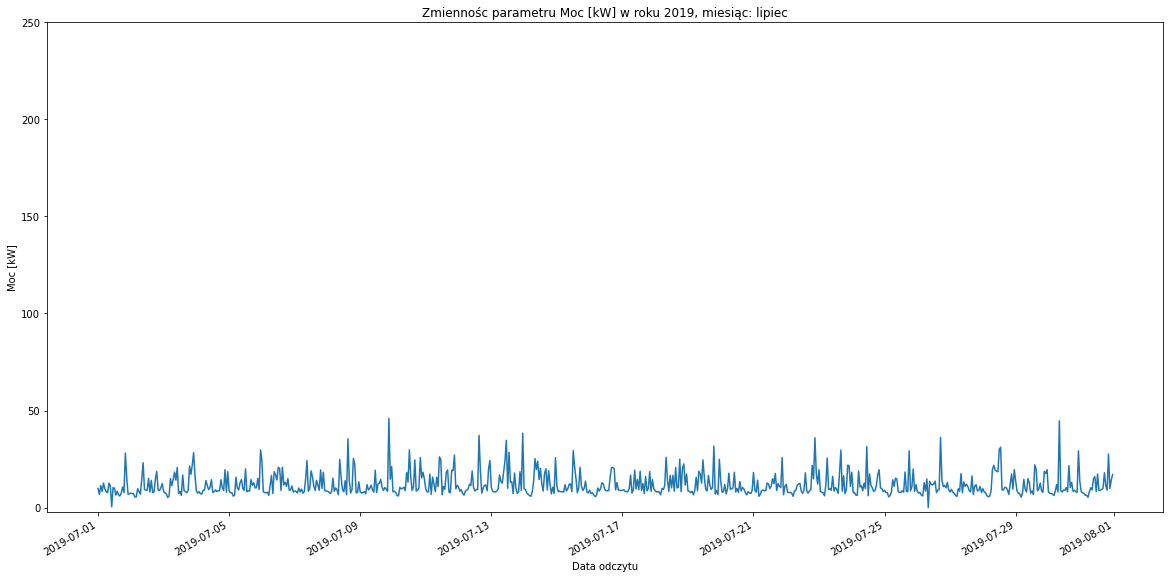

In [14]:
monthIdx = 7
column = 'Moc [kW]'

for year in dataset['Rok'].unique():
    if len(dataset[(dataset['Rok'] == year) & 
           (dataset['Miesiąc'] == monthIdx)][column]) != 0:
    
        fig, ax = plt.subplots()


        dataset[(dataset['Rok'] == year) & 
               (dataset['Miesiąc'] == monthIdx)][column].plot(figsize = (20,10), ax = ax)

        plt.title(f"Zmiennośc parametru {column} w roku {year}, miesiąc: {monthDics[str(monthIdx)]}")
        plt.ylim(top = 250)
        plt.ylabel(column)
        plt.show()

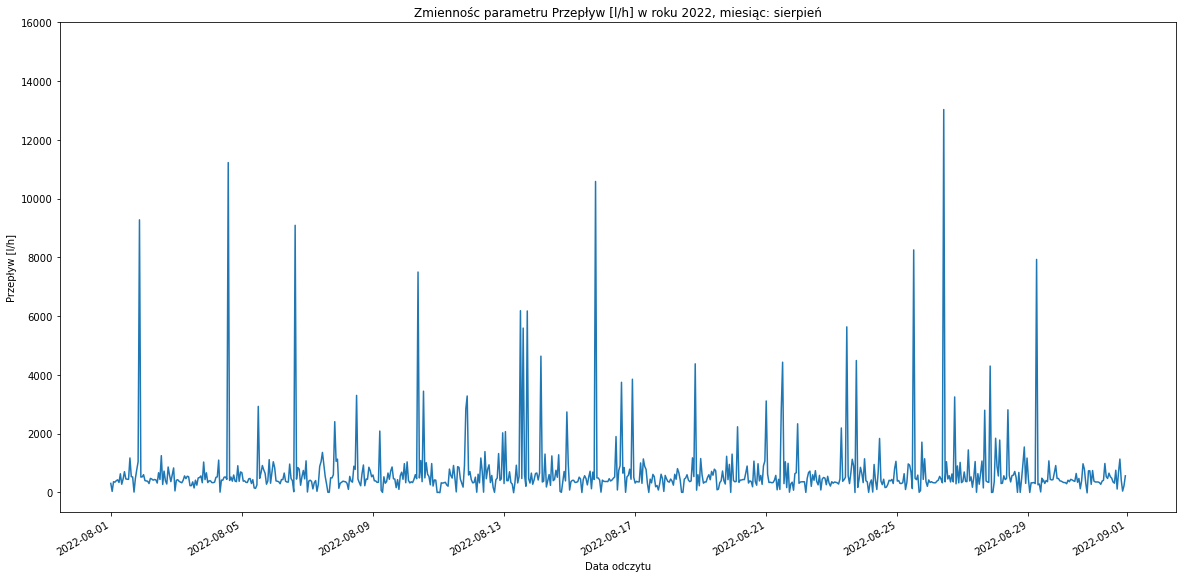

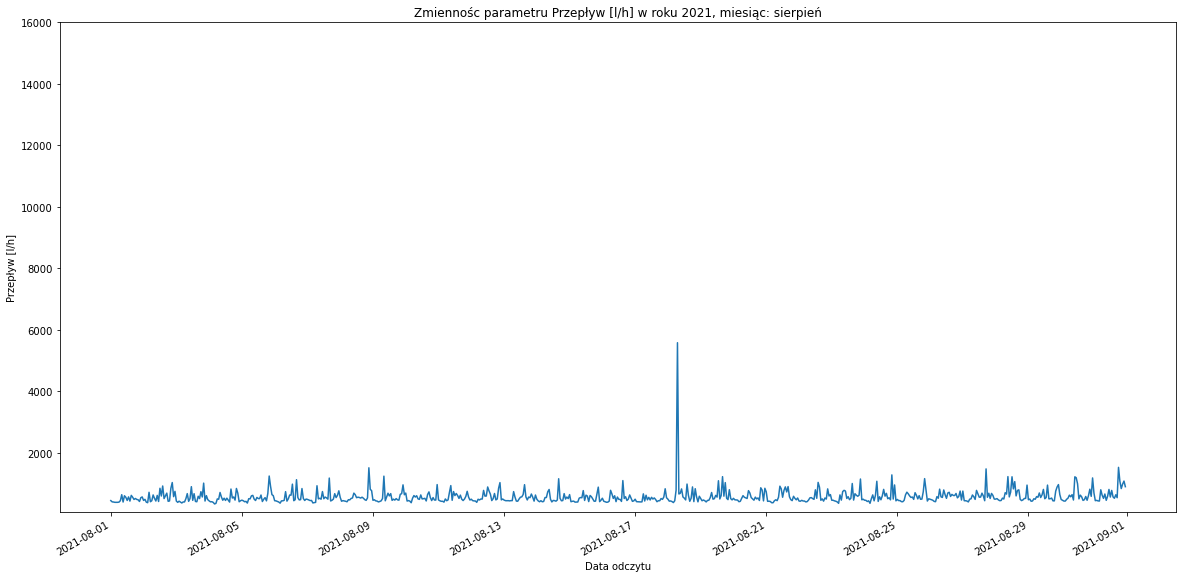

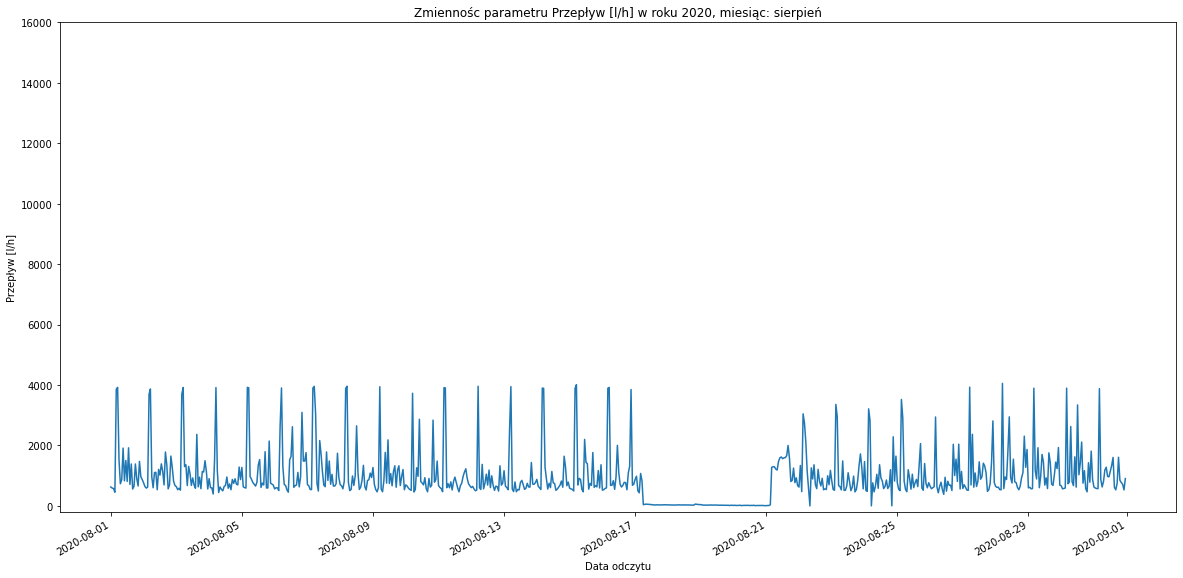

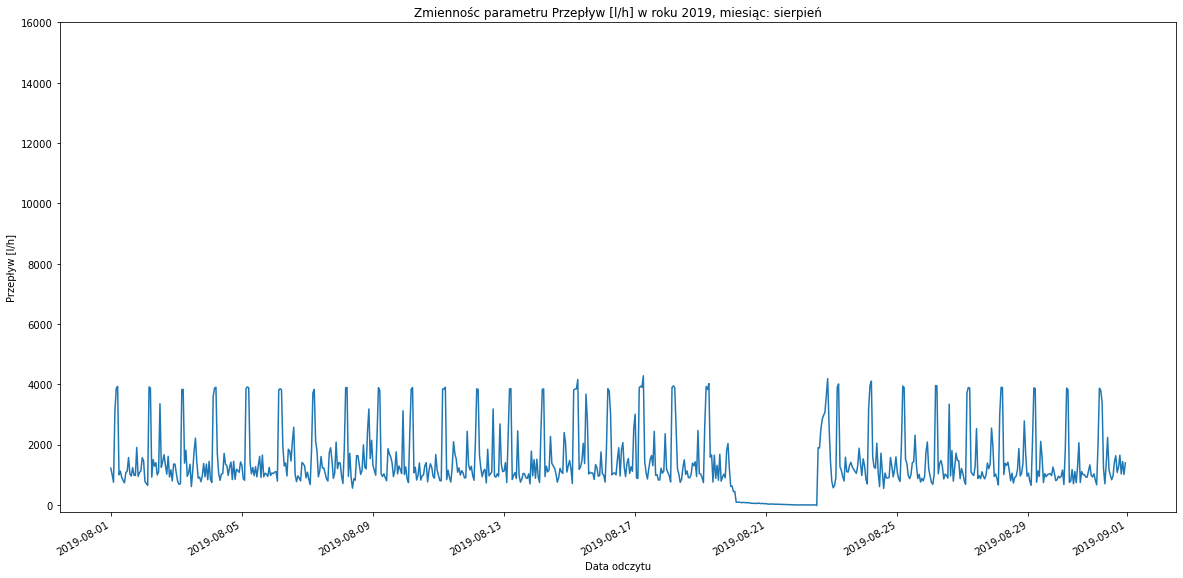

In [15]:
monthIdx = 8
column = 'Przepływ [l/h]'

for year in dataset['Rok'].unique():
    if len(dataset[(dataset['Rok'] == year) & 
           (dataset['Miesiąc'] == monthIdx)][column]) != 0:
    
        fig, ax = plt.subplots()
        

        dataset[(dataset['Rok'] == year) & 
               (dataset['Miesiąc'] == monthIdx)][column].plot(figsize = (20,10), ax = ax)

        plt.title(f"Zmiennośc parametru {column} w roku {year}, miesiąc: {monthDics[str(monthIdx)]}")
        plt.ylim(top = 16000)
        plt.ylabel(column)
        plt.show()

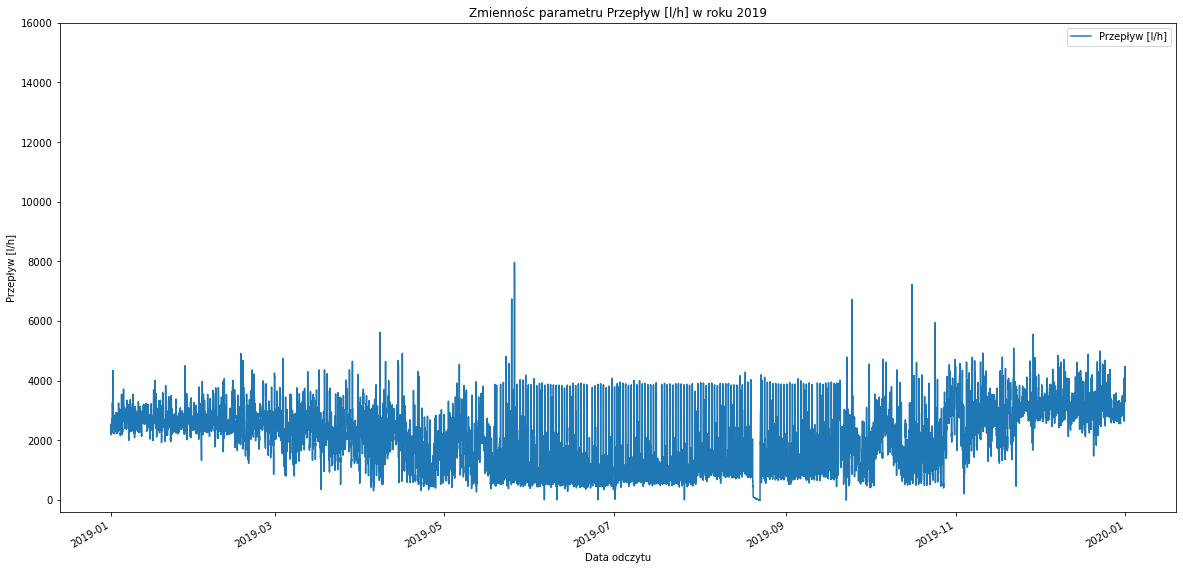

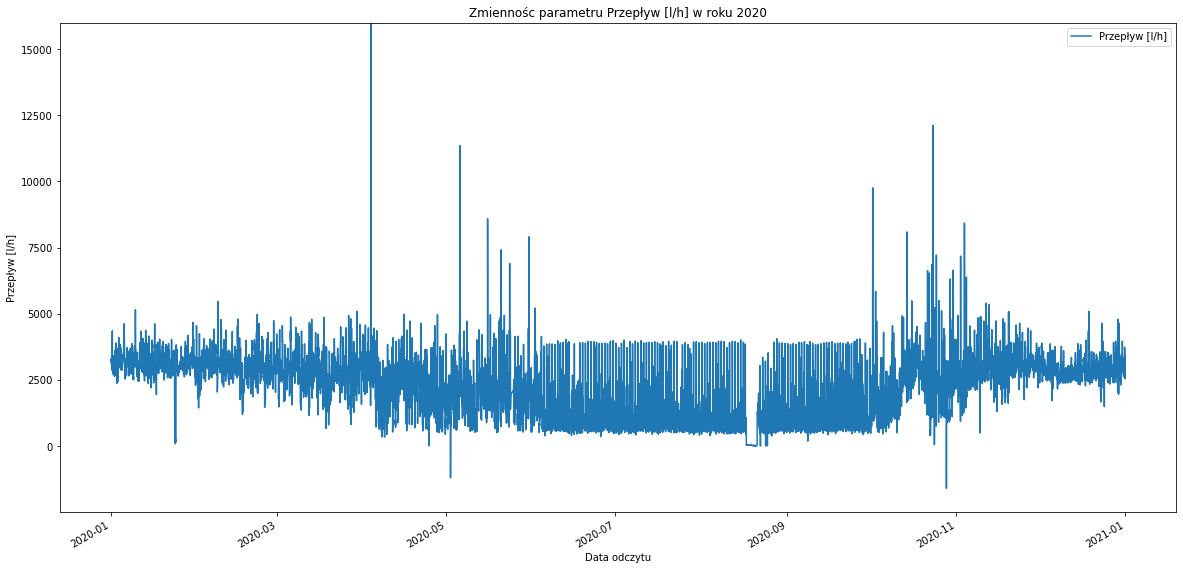

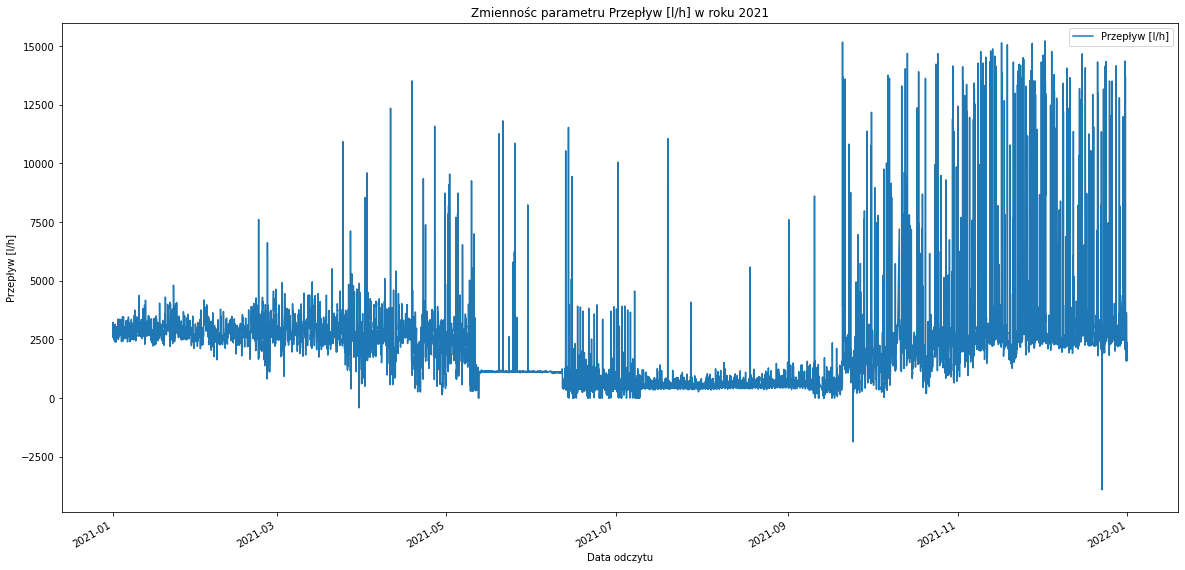

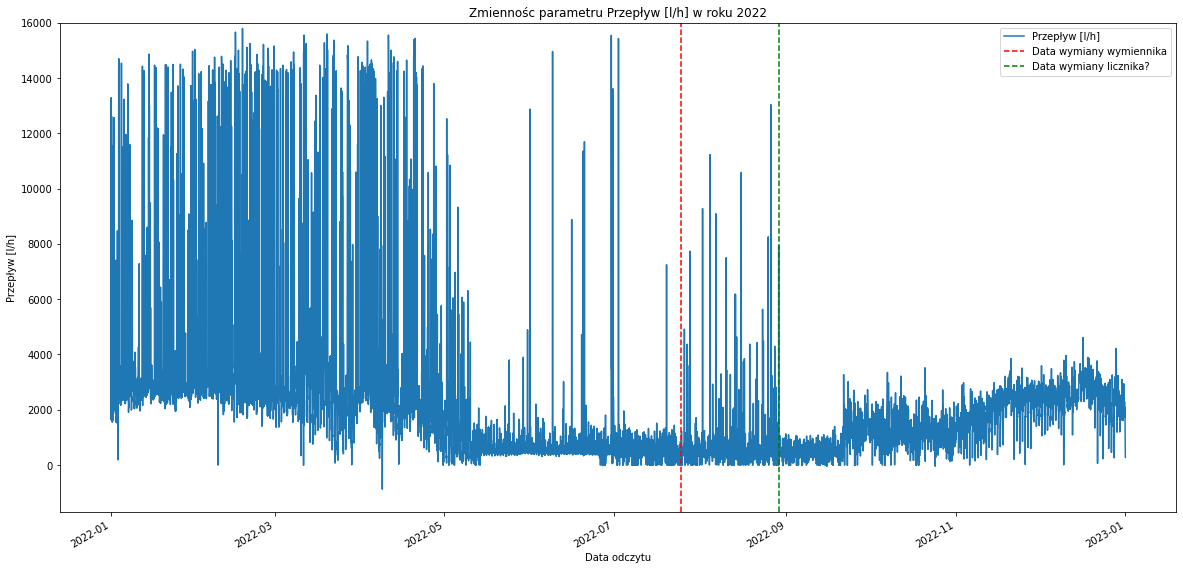

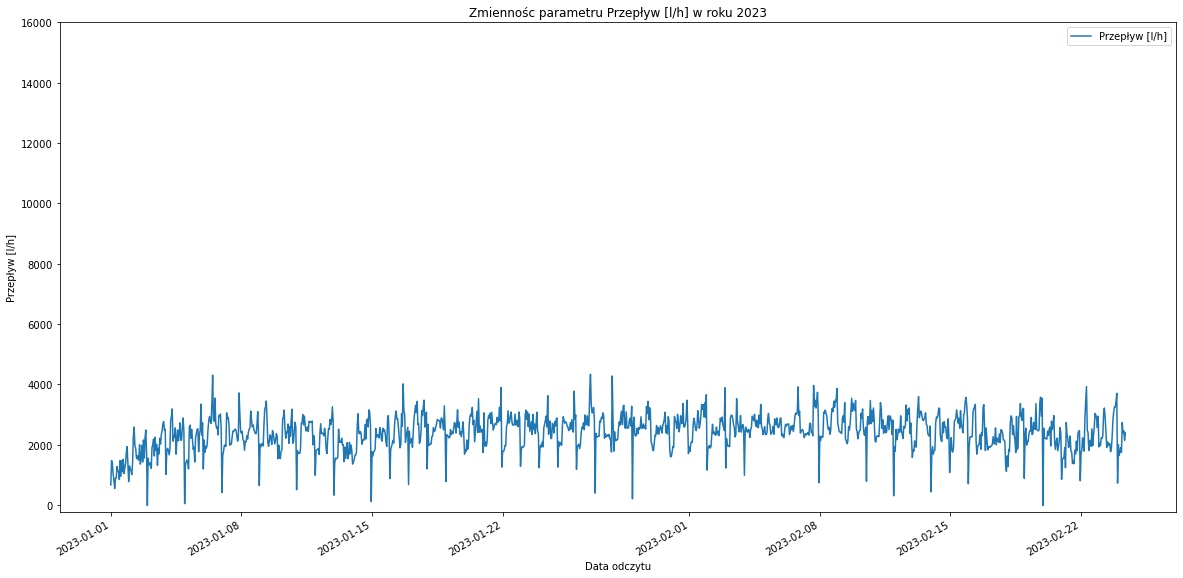

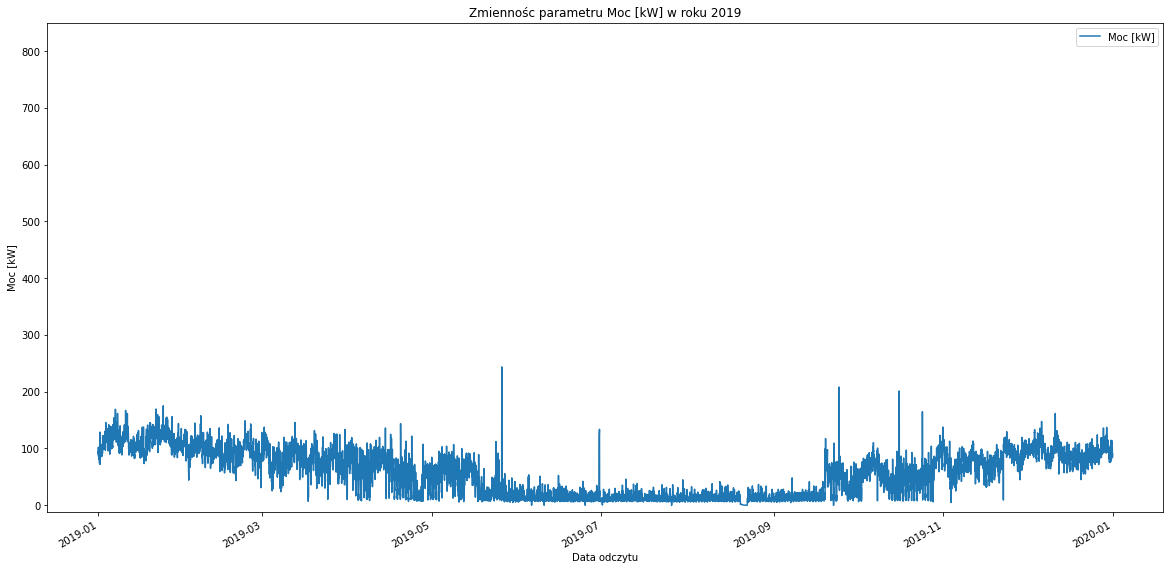

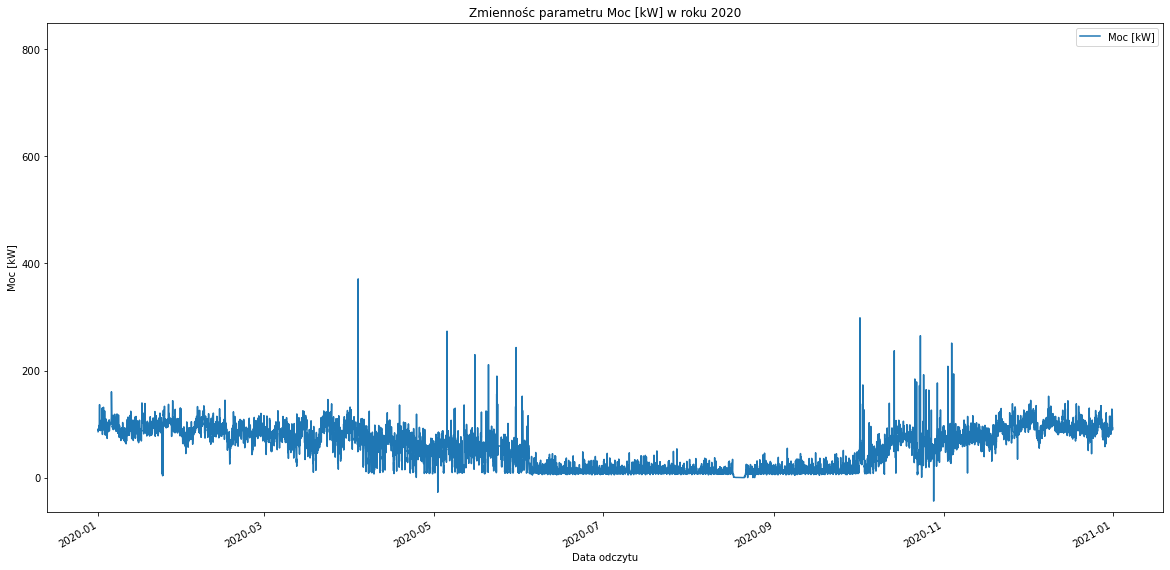

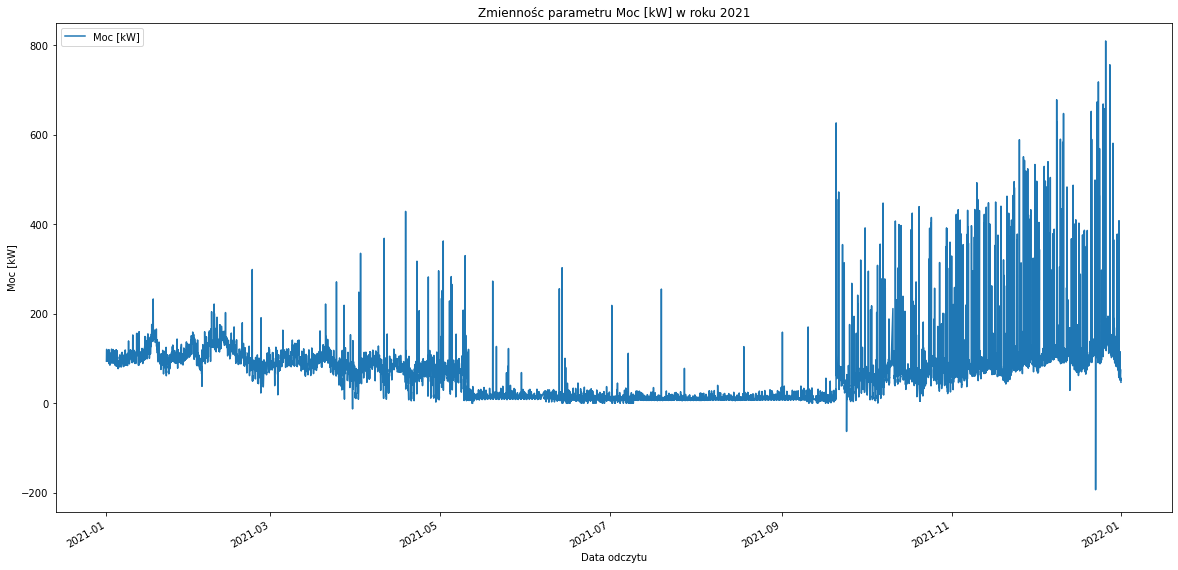

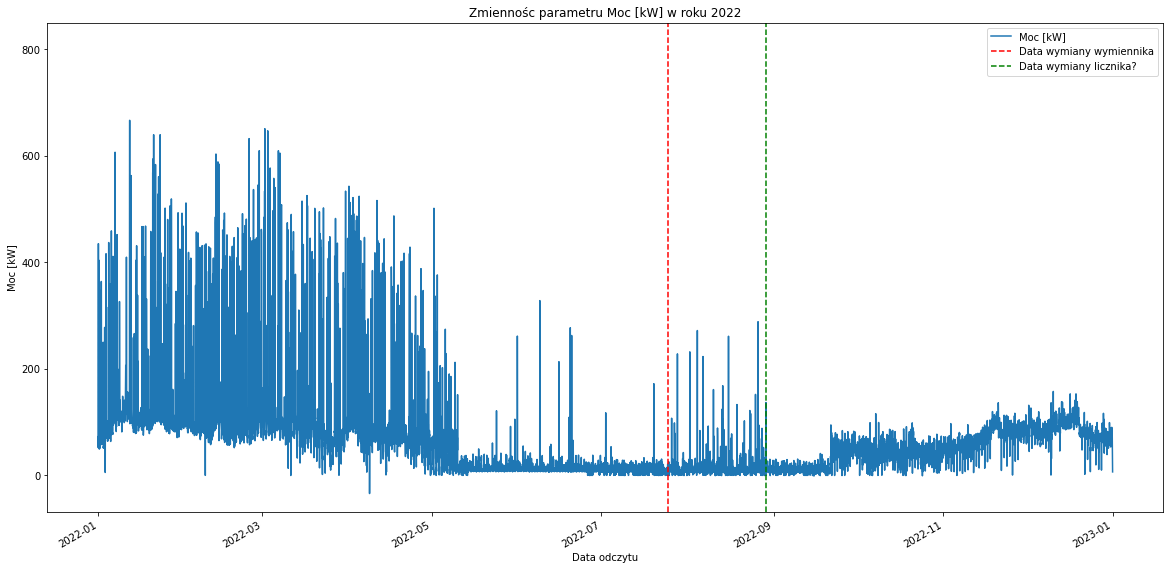

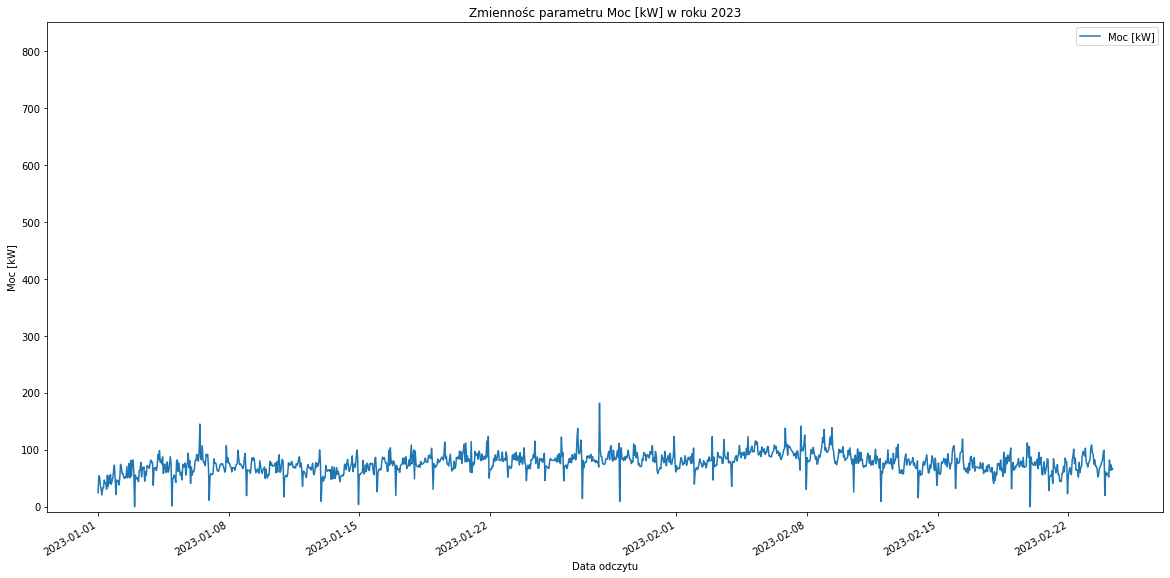

In [16]:

column = 'Przepływ [l/h]'

for year in sorted(dataset['Rok'].unique()):
    if len(dataset[(dataset['Rok'] == year)][column]) != 0:
    
        fig, ax = plt.subplots()
        

        dataset[(dataset['Rok'] == year)][column].plot(figsize = (20,10), ax = ax)

        plt.title(f"Zmiennośc parametru {column} w roku {year}")
        plt.ylim(top = 16000)
        plt.ylabel(column)
        if year == 2022:
            ax.axvline(x = dataWc, color = 'red', ls = "--", label = "Data wymiany wymiennika" )
            ax.axvline(x = dataLc, color = 'green', ls = "--", label = "Data wymiany licznika?" )
        plt.legend(loc = 0)
        plt.show()
        

column = 'Moc [kW]'

for year in sorted(dataset['Rok'].unique()):
    if len(dataset[(dataset['Rok'] == year)][column]) != 0:
    
        fig, ax = plt.subplots()
        

        dataset[(dataset['Rok'] == year)][column].plot(figsize = (20,10), ax = ax)

        plt.title(f"Zmiennośc parametru {column} w roku {year}")
        plt.ylim(top = 850)
        plt.ylabel(column)
        if year == 2022:
            ax.axvline(x = dataWc, color = 'red', ls = "--", label = "Data wymiany wymiennika" )
            ax.axvline(x = dataLc, color = 'green', ls = "--", label = "Data wymiany licznika?" )
        plt.legend(loc = 0)
        plt.show()

In [17]:
years = list(dataset['Rok'].unique())

sorted(years)

[2019, 2020, 2021, 2022, 2023]

In [19]:
dataset.index.min()

Timestamp('2019-01-01 00:00:01')

In [20]:
dataset.index.max()

Timestamp('2023-02-24 09:00:02')

<AxesSubplot:xlabel='Rok'>

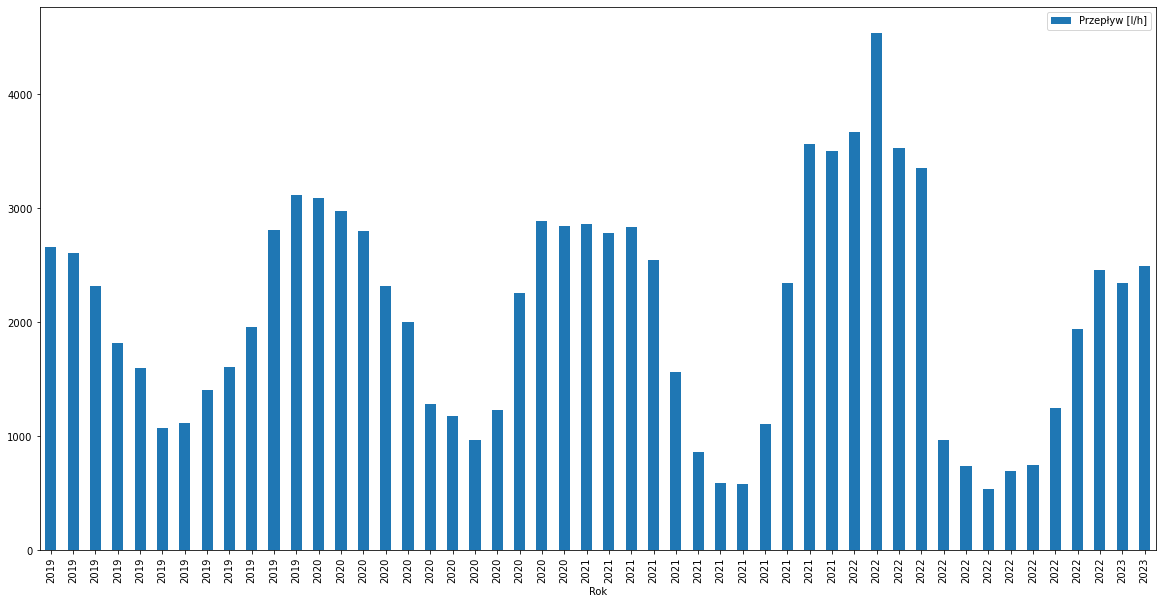

In [33]:
summYearMonth['Rok'] = [i[0] for i in summYearMonth.index]
summYearMonth.plot(kind = 'bar', x = 'Rok', y = [summYearMonth.columns[0]], figsize = (20,10))

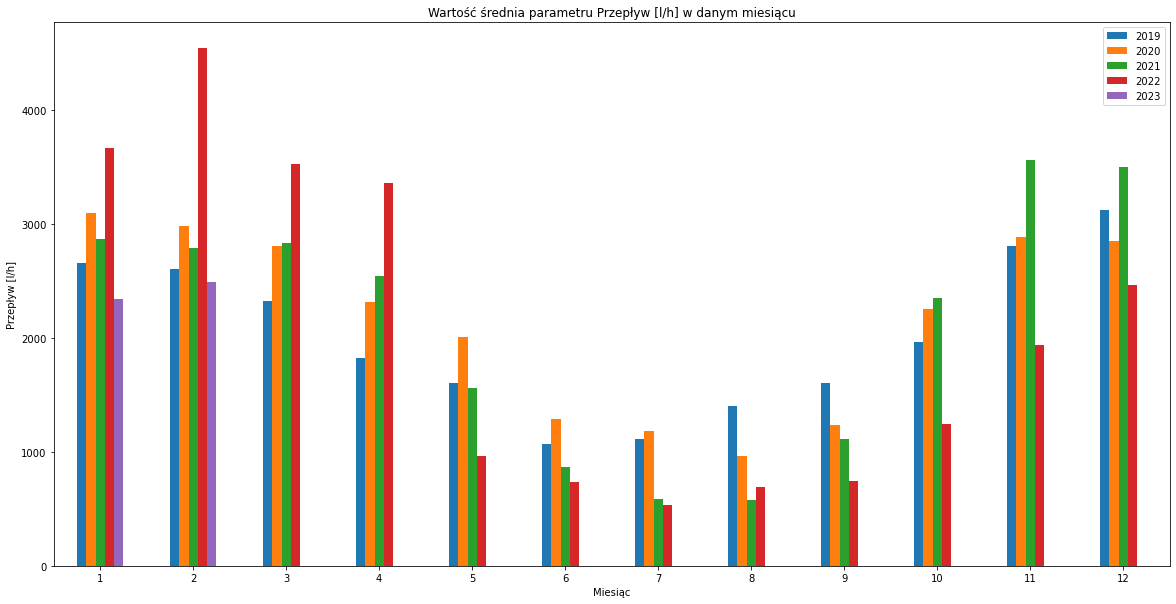

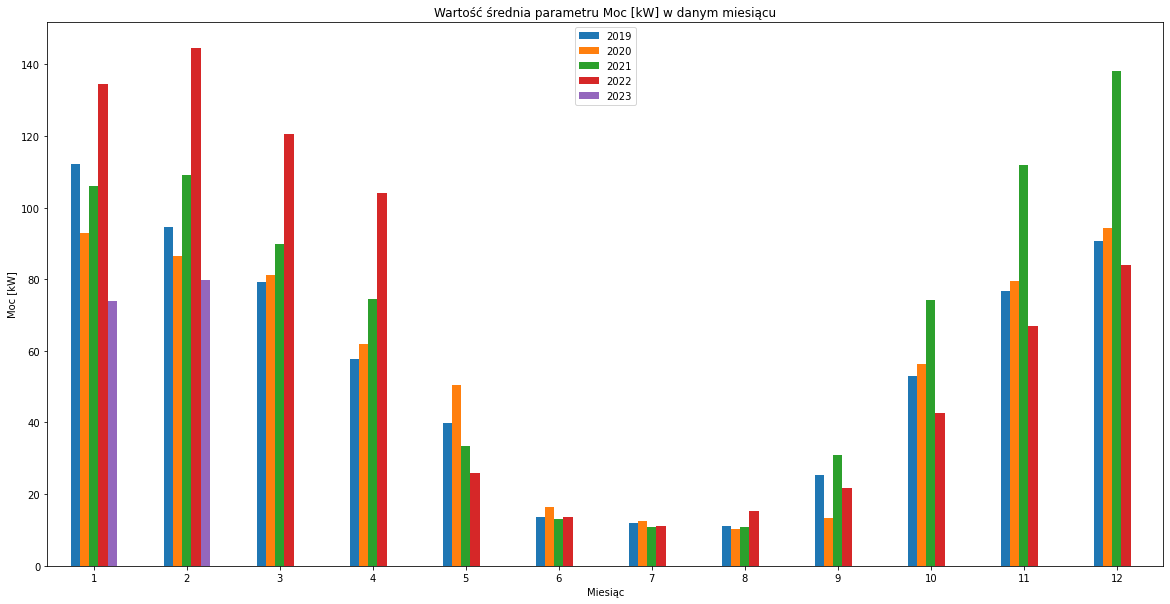

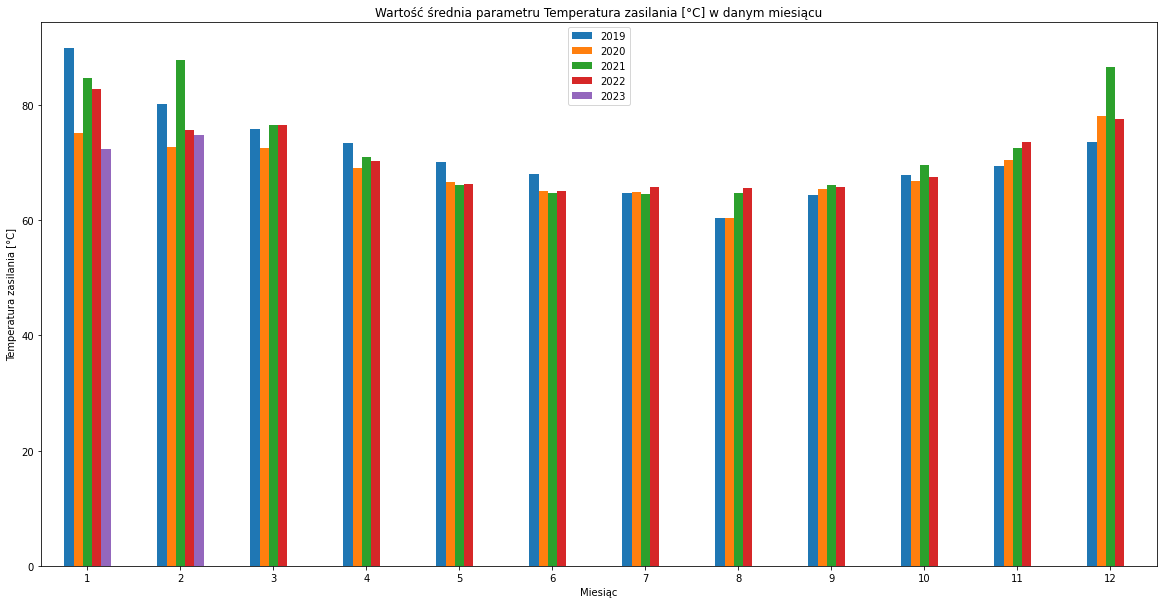

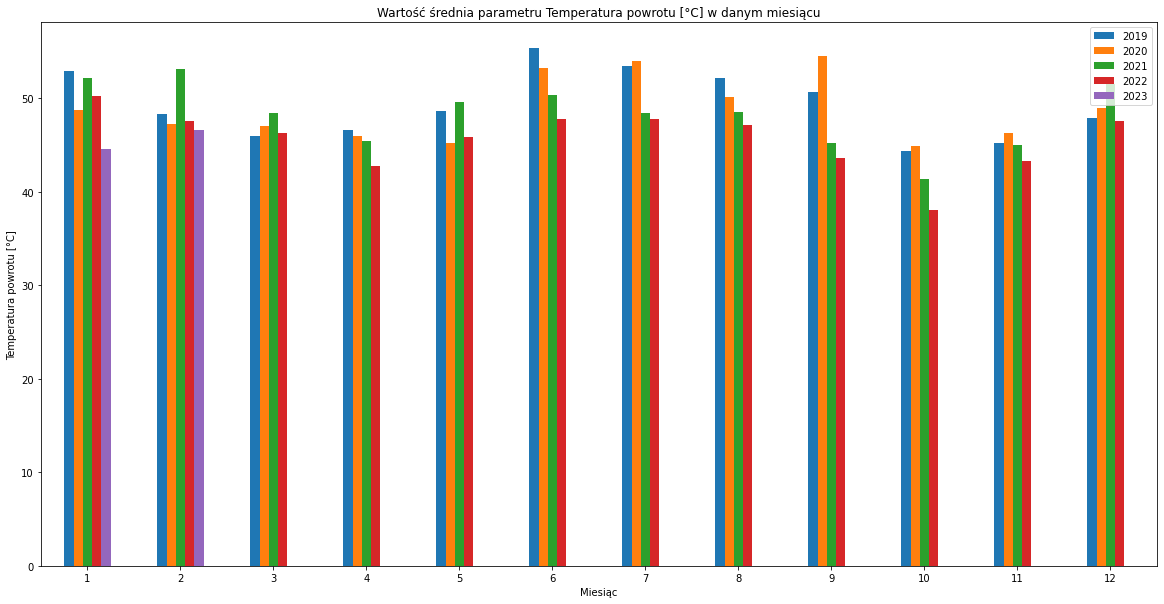

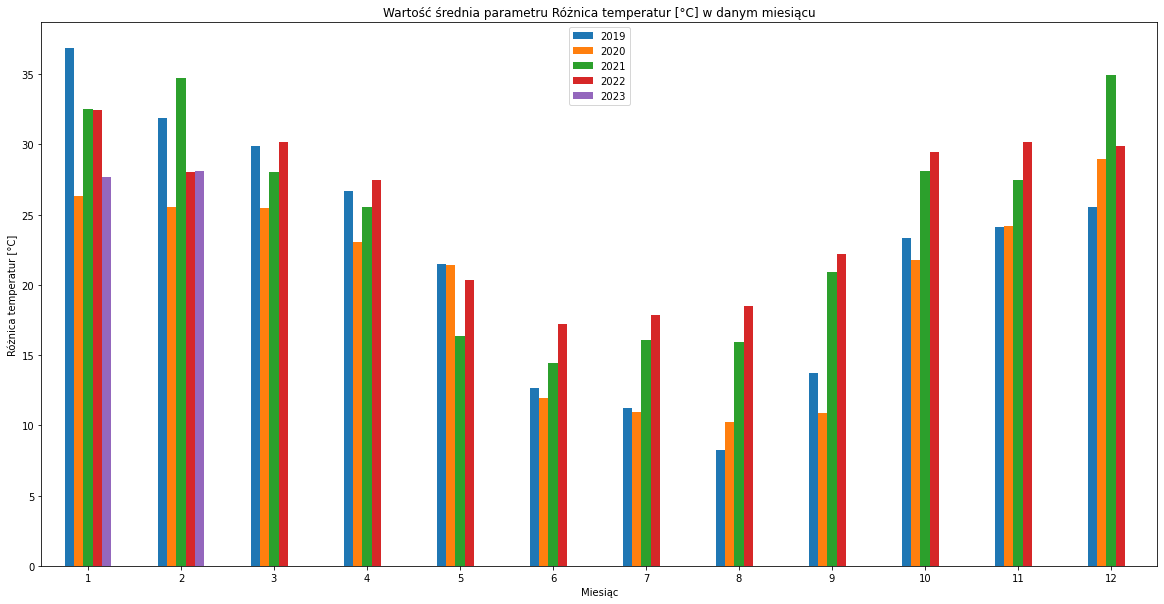

In [150]:
kolumny = summYearMonth.columns
column = 0

for column in range(5):
    y2019 = summYearMonth.iloc[:12,column].values.tolist()
    y2020 = summYearMonth.iloc[12:24,column].values.tolist()
    y2021 = summYearMonth.iloc[24:36,column].values.tolist()
    y2022 = summYearMonth.iloc[36:48,column].values.tolist()
    y2023 = summYearMonth.iloc[48:,column].values.tolist()

    data = [y2019, y2020,y2021,y2022,y2023]

    for idx, element in enumerate(data):
        element.insert(0,idx + 2019)

    columns = [i for i in range(1,13)]
    columns.insert(0,'Rok')

    dataDf = pd.DataFrame(index = range(2019, 2024), data = data, columns = columns)
    dataDf = dataDf.T.iloc[1:,]
    dataDf['Rok'] = dataDf.index
    
    fig, ax = plt.subplots(figsize = (20,10))
    dataDf.plot(x='Rok',
            kind='bar',
            #stacked=False,
            title=f'Wartość średnia parametru {kolumny[column]} w danym miesiącu',
            ax = ax,
            #colormap = 'cool'
               )
    plt.xlabel("Miesiąc")
    plt.xticks(rotation = 0)
    plt.legend(loc = 0)
    plt.ylabel(f'{kolumny[column]}')